<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy.random import sample
from numpy.random import normal
from math import sin
from math import pi
from collections import OrderedDict 
from scipy.optimize import curve_fit
%matplotlib inline
plt.style.use(['ggplot'])

In [ ]:
mu, sigma = 0, 0.3 # mean and standard deviation
X = np.arange(0,1.1,0.1)
Y = np.array([sin(2*pi*x)+normal(mu, sigma, 1) for x in X])

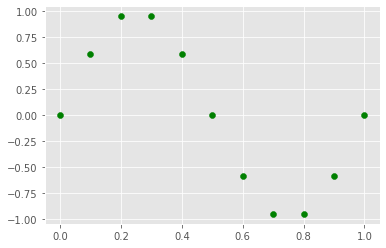

In [ ]:
plt.scatter(X,np.array([sin(2*pi*x)for x in X]),c='g')        #before adding noise

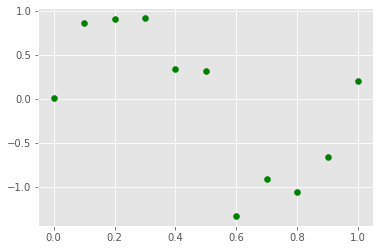

In [ ]:
plt.scatter(X,Y,c="g")        #after adding noise

In [ ]:
global x
global x_test 
global y
global y_test 
x,x_test,y,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x = np.array(X).reshape(-1)
y = np.array(Y).reshape(-1)

In [ ]:
def gradientDescent(x,y,lr, epochs):
    costs = []
    b0, b1 = 0.0, 1.0
    for epoch in range(epochs):
        # initialize to 0 -> cost of epoch, Jb_0, Jb_1
        epoch_cost, cost_b0, cost_b1 = 0, 0, 0
        
        for i in range(len(x)):
            # make prediction
            y_pred = (b0 + b1*x[i])
            # append squared error
            epoch_cost += (y[i] - y_pred)**2 
            
            for j in range(len(x)):
                # partial derivative of b0 and b1 for current row
                partial_wrt_b0 = -2 * (y[j] - (b0 + b1*x[j]))
                partial_wrt_b1 = (-2 * x[j]) * (y[j] - (b0 + b1*x[j]))
                
                # increase cost of coeffs
                cost_b0 += partial_wrt_b0
                cost_b1 += partial_wrt_b1

            # calculate new coeffs
            b0 = b0 - lr * cost_b0
            b1 = b1 - lr * cost_b1
            
        # keep track of errors - for visualization purposes
        costs.append(epoch_cost)
    return b0,b1,costs

def predict(x,C,M):
    y_pred = []
    for value in x:
        y = (C + M * value)
        y_pred.append(y)
    return y_pred

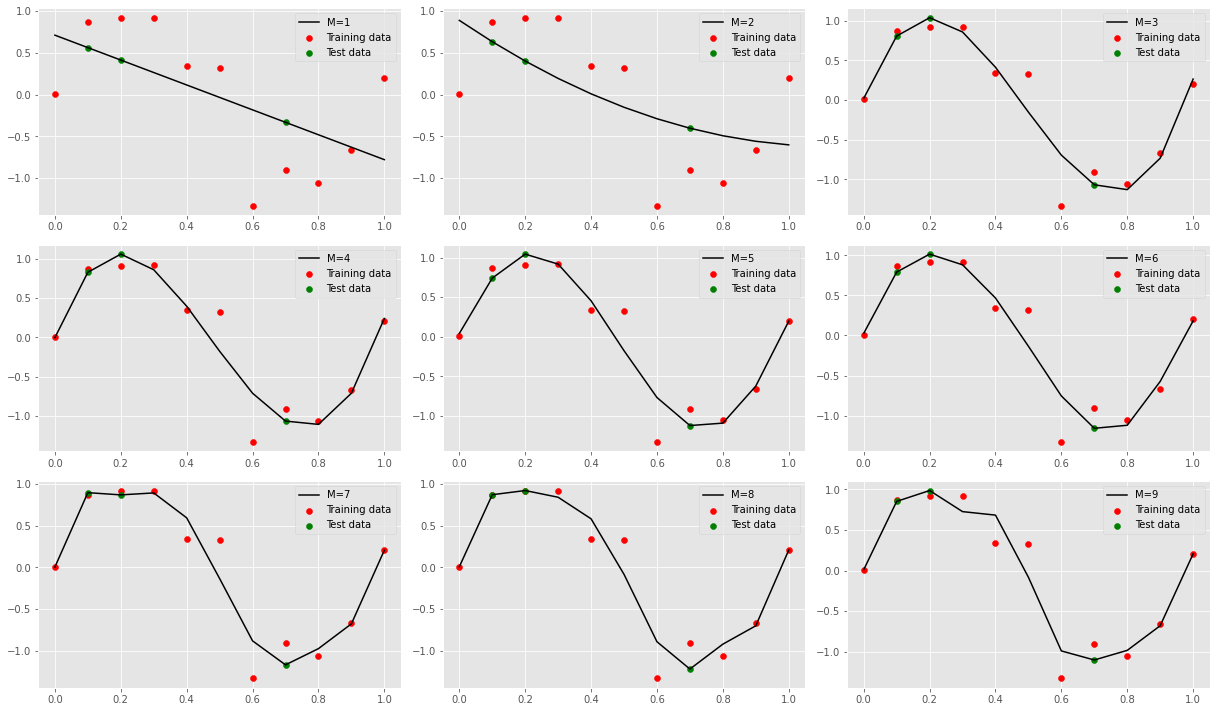

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(17,10))
i=0
j=0
err_train = []
err_test = []
for n in range(1,10):
    P = gradientDescent(x,y,0.05,10000)
    z = np.polyfit(x,y,n)
    p = np.poly1d(z)
    y_pred = p(x)
    y_p_test = p(x_test)
    err_train.append(0.5*(np.sum((y_pred-y)**2)))         #Squared Error calculation
    err_test.append(0.5*(np.sum((y_p_test-y_test)**2))) 
    ax[i,j].scatter(x,y,c='r')
    ax[i,j].plot(x,y_pred,c='black')
    ax[i,j].scatter(x_test,y_p_test,c="g")
    ax[i,j].legend(('M={}'.format(n),'Training data','Test data'))
    j+=1
    if n%3 == 0:
        i+=1
        j=0
fig.tight_layout()

### **As per the output visualizations best choise of polynomial degree can be taken as 5 for the given points**

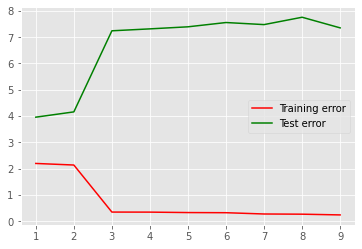

In [ ]:
plt.plot(range(1,10),err_train,c="r")
plt.plot(range(1,10),err_test,c='g')
plt.legend(('Training error','Test error'))

In [ ]:

def fitting():
    err_train = []
    err_test = []
    ds = [10,100,1000,10000]
    mu, sigma = 0, 0.3 # mean and standard deviation
    for s in ds:
        X = np.arange(0,1.1,1/s)
        Y = np.array([sin(2*pi*x)+normal(mu, sigma, 1) for x in X])
        x,x_test,y,y_test = train_test_split(X,Y,test_size=0.2)
        x = np.array(X).reshape(-1)
        y = np.array(Y).reshape(-1)
        e_train = []
        e_test = []
        for n in range(1,10):
            z = np.polyfit(x,y,n)
            p = np.poly1d(z)
            y_pred = p(x)
            y_p_test = p(x_test)
            e_train.append(0.5*(np.sum((y_pred-y)**2)))         #Squared Error calculation
            e_test.append(0.5*(np.sum((y_p_test-y_test)**2)))
        err_train.append(e_train)
        err_test.append(e_test)
    plt.scatter(x,y,c='b',s=1)
    plt.plot(x,y_pred,c="black")
    plt.scatter(x_test,y_p_test,c='g')
    return err_train,err_test

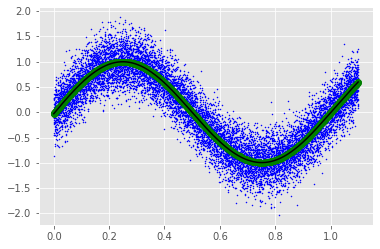

In [ ]:
err_train,err_test = fitting()

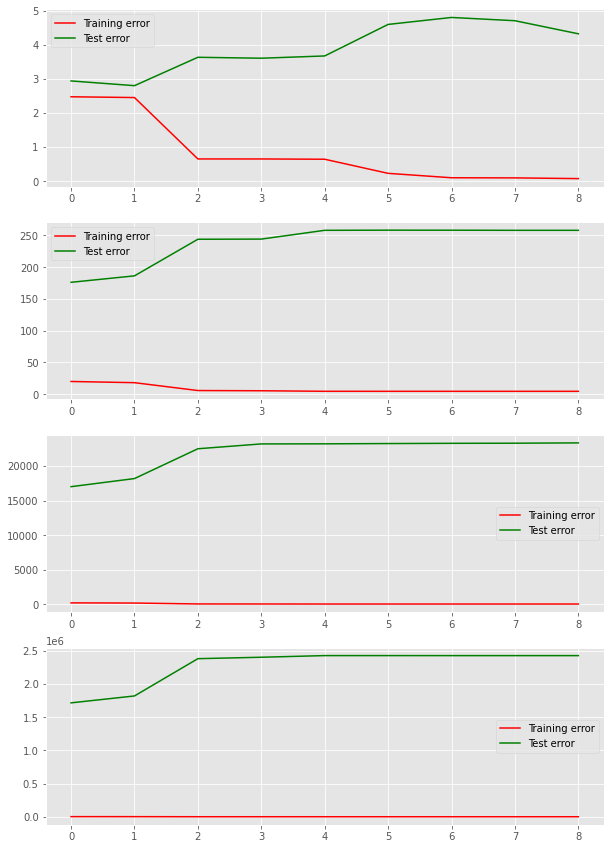

In [ ]:
fig,ax = plt.subplots(4,figsize=(10,15))
for n in range(4):
    ax[n].plot(range(len(err_train[n])),err_train[n],c="r")
    ax[n].plot(range(len(err_test[n])),err_test[n],c='g')
    ax[n].legend(('Training error','Test error'))

-----------

## Logistic Regression on Breat Cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

x,y = load_breast_cancer(return_X_y=True)
df = pd.read_csv("/content/breast_cancer.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [ ]:
df.radius.isnull().sum()

71

In [ ]:
df.groupby('diagnosis')["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

Missing values can be filled with mean values as per the diagnosis of cancer

In [ ]:
def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]

    if pd.isnull(radius):
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17.5
        # if woman was not diagnosed with breast cancer
        else:
            return 12.3
    return radius

In [ ]:
df['radius'] = df[['radius', 'diagnosis']].apply(impute_radius, axis = 1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
def cancer_classifier(size):
    test_acc = []
    train_acc = []
    for s in size:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=s)
        clf = LogisticRegression(max_iter=10000)
        clf.fit(x_train,y_train)
        scaler = preprocessing.StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        y_pred_test = clf.predict(x_test)
        y_pred_train = clf.predict(x_train)
        test_acc.append(accuracy_score(y_test,y_pred_test))
        train_acc.append(accuracy_score(y_train,y_pred_train))
    return train_acc , test_acc

def create_df(train_acc,test_acc):
    per = ["10%",'20%','30%','40%','50%','60%']
    df = pd.DataFrame(per)
    df["Training Accuracy"] = train_acc
    df["Testing Accuracy"] = test_acc
    df.rename(columns={0:"Accuracy"},inplace=True)
    return df

In [23]:
size_test = [0.1,0.2,0.3,0.4,0.5,0.6]
size_train = [0.9,0.8,0.7,0.6,0.5,0.4]

train_acc, test_acc = cancer_classifier(size_train)
df1 = create_df(train_acc,test_acc)
df.to_csv("Accuracy_Lab4_train.csv")

train_acc, test_acc = cancer_classifier(size_test)
df2 = create_df(train_acc,test_acc)
df2.to_csv("Accuracy_Lab4_test.csv")

In [24]:
print(df1)

  Accuracy  Training Accuracy  Testing Accuracy
0      10%           0.517857          0.639376
1      20%           0.681416          0.614035
2      30%           0.617647          0.631579
3      40%           0.621145          0.631579
4      50%           0.637324          0.617544
5      60%           0.627566          0.627193


In [25]:
print(df2)

  Accuracy  Training Accuracy  Testing Accuracy
0      10%           0.623047          0.666667
1      20%           0.639560          0.578947
2      30%           0.645729          0.584795
3      40%           0.656891          0.583333
4      50%           0.609155          0.645614
5      60%           0.665198          0.602339
